**EDA 1 : BIKE DETAILS DATASET**




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("/content/BIKE DETAILS.csv")

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
missing_values=df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


<Axes: xlabel='ex_showroom_price', ylabel='Density'>

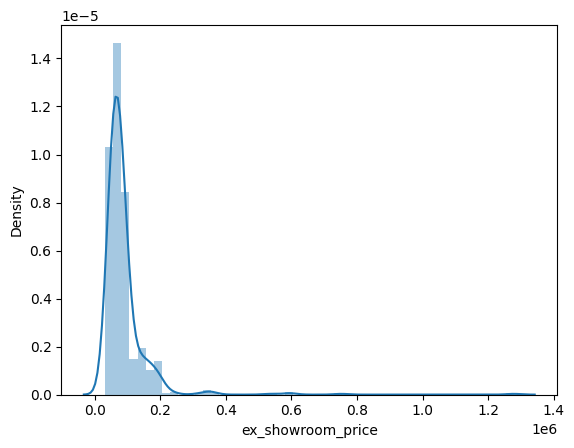

In [ ]:
#THERE ARE 435 NULL VALUES IN THE COLUMN ' ex_showroom_price ' . So we will imputate the null values by mean(if no outlier is present) or median (if outlier is present).


sns.distplot(df["ex_showroom_price"])

Since, the plot is a normal plot so the null values will be imputated by the mean value.

In [ ]:
df['ex_showroom_price'].fillna(df["ex_showroom_price"].mean())

,ex_showroom_price
0,87958.714058
1,87958.714058
2,148114.000000
3,89643.000000
4,87958.714058
...,...
1056,52000.000000
1057,51000.000000
1058,57000.000000
1059,58000.000000


## **Q1. What is the range of selling prices in the dataset?**

**ANS1.**

In [ ]:
df["selling_price"]

,selling_price
0,175000
1,45000
2,150000
3,65000
4,20000
...,...
1056,17000
1057,16000
1058,15000
1059,12000


In [ ]:
df.selling_price.max(axis=0)

760000

In [ ]:
df.selling_price.min(axis=0)

5000

In [ ]:
range = 760000-5000
range

755000

Range = Max selling price - Min selling price= 760000-5000= 755000

**Q2. What is the median selling price for bikes in the dataset?**

**ANS2:** The median selling price for bikes in the dataset is given below:


In [ ]:
df.selling_price.median(axis=0)

45000.0

**Q3. What is the most common seller type?**

**ANS3:** The most common seller type is " Individual ".

In [ ]:
df["seller_type"].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


**Q4. How many bikes have driven more than 50,000 kilometers?**


**ANS4.**

In [ ]:
df["km_driven"]

,km_driven
0,350
1,5650
2,12000
3,23000
4,21000
...,...
1056,500000
1057,33000
1058,35000
1059,53000


The number of bikes that have driven more than 50,000 kilometers are 170.

In [ ]:
len(df[df["km_driven"] > 50000])

170

**Q5. What is the average km_driven value for each ownership type?**


**ANS5.**

In [ ]:
average_km_by_owner = df.groupby('owner')['km_driven'].mean()
average_km_by_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


**Q6. What proportion of bikes are from the year 2015 or older?**


**ANS6.**

In [ ]:
len(df[df['year'] >= 2015])


# The proportion of bikes from the year 2015 or older are 560.

560

**Q7. What is the trend of missing values across the dataset?**


**ANS7.**

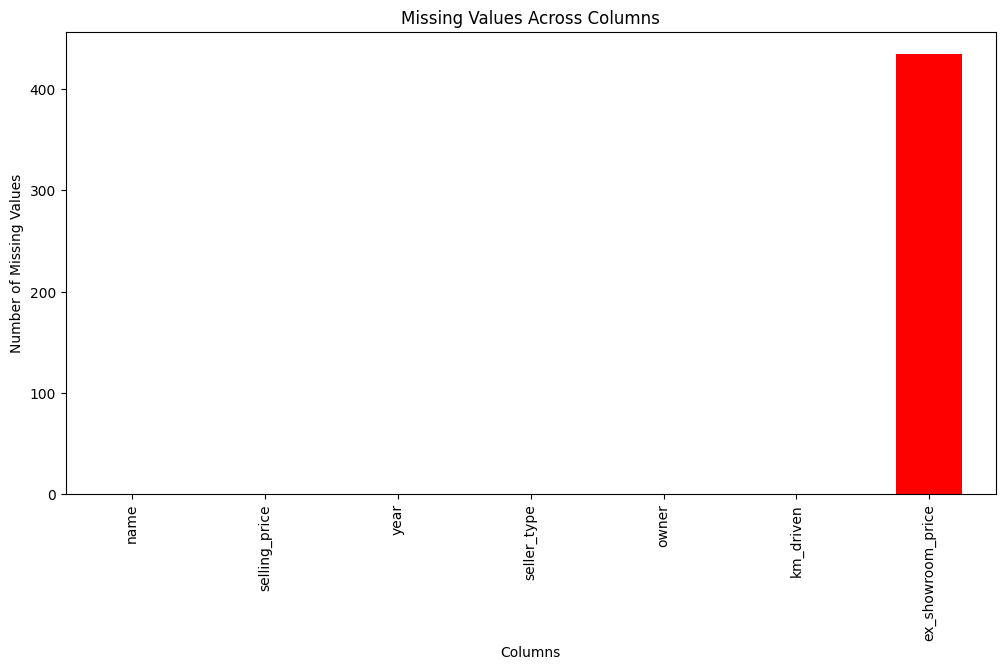

In [ ]:
# Plot missing values as a bar plot
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='red')
plt.title('Missing Values Across Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

plt.show()


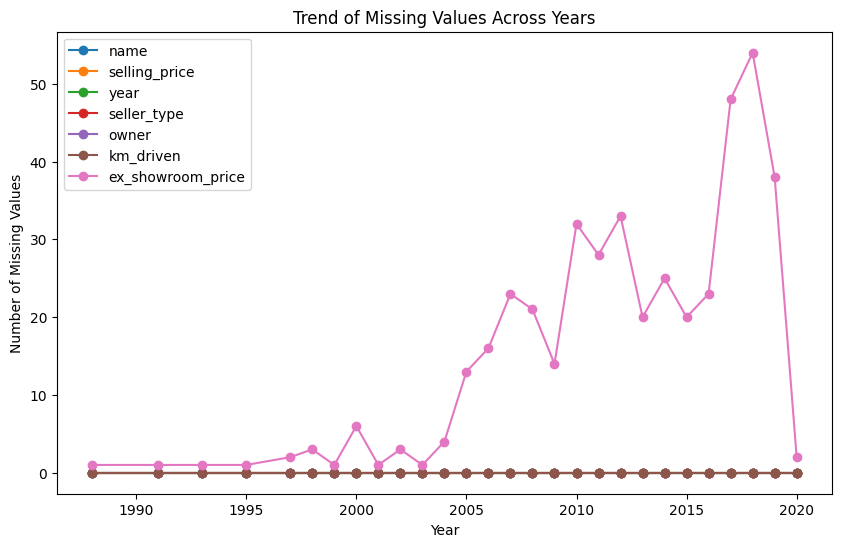

In [ ]:

missing_by_year = df.groupby('year').apply(lambda x: x.isnull().sum())


missing_by_year.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Trend of Missing Values Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')

plt.legend(missing_by_year.columns)
plt.show()


**Q8. What is the highest ex_showroom_price recorded, and for which bike?**


**ANS8.**

In [ ]:
df.groupby(["name"])["ex_showroom_price"].sum().sort_values(ascending=False).reset_index()


# The highest ex_showroom_price recorded is 19633854.0 for the bike "Honda CB Hornet 160R"

,name,ex_showroom_price
0,Honda CB Hornet 160R,1963854.0
1,Bajaj Pulsar 180,1700220.0
2,Yamaha FZ S V 2.0,1356984.0
3,Harley-Davidson Street Bob,1278000.0
4,Kawasaki Ninja 650 [2018-2019],1188000.0
...,...,...
274,Suzuki SlingShot,0.0
275,Hero Honda Passion Plus,0.0
276,Bajaj Pulsar RS 200,0.0
277,Suzuki Intruder 150,0.0


**Q9. What is the total number of bikes listed by each seller type?**

**Ans9:** The total number of bikes listed by each seller type is:

Individual : 1055

Dealer: 6


In [ ]:
df["seller_type"].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


**Q10. What is the relationship between selling_price and km_driven for first-owner bikes?**

**Ans10:** With increase in km_driven the selling_price decreases.


In [ ]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
df[df['owner'] == "1st owner"]


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


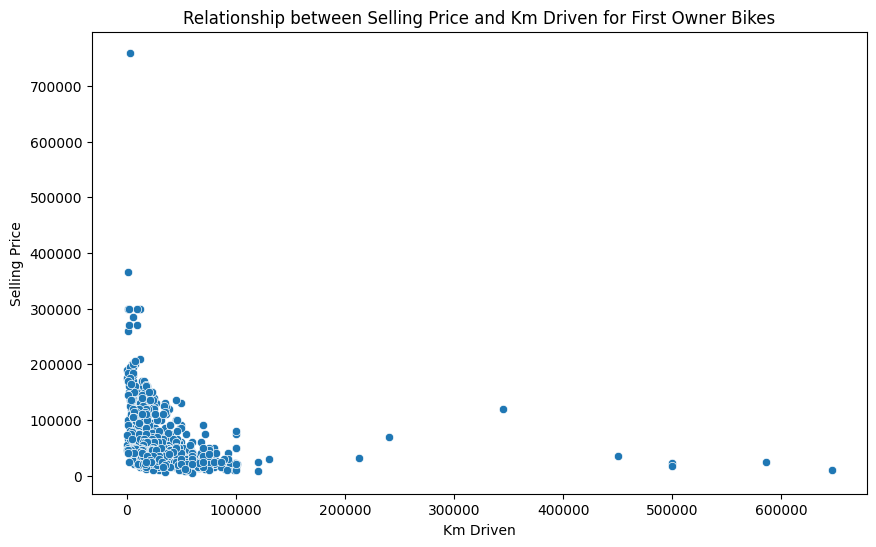

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df[df['owner'] == "1st owner"])
plt.title('Relationship between Selling Price and Km Driven for First Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

**Q11. Identify and remove outliers in the km_driven column using the IQR method.**

**ANS11.**

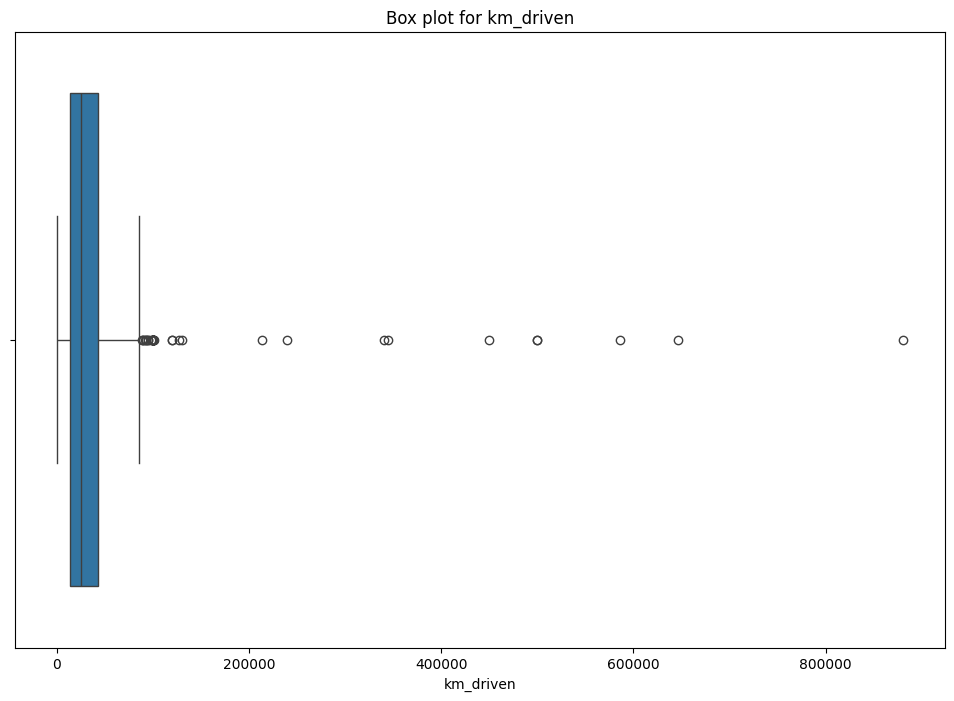

In [ ]:
plt.figure(figsize= (12,8))

sns.boxplot(x='km_driven',data = df)
plt.title("Box plot for km_driven")
plt.show()

The box plot shows that there are multiple outliers.

In [ ]:
Q1=df["km_driven"].quantile(0.25)
Q3=df["km_driven"].quantile(0.75)
IQR=Q3-Q1
lower_fence=Q1-1.5*IQR
upper_fence=Q3+1.5*IQR
df_filtered=df[(df.km_driven>=lower_fence) & (df.km_driven <= upper_fence)]
df_filtered

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


**Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.**

**ANS12.**

<Axes: xlabel='year', ylabel='selling_price'>

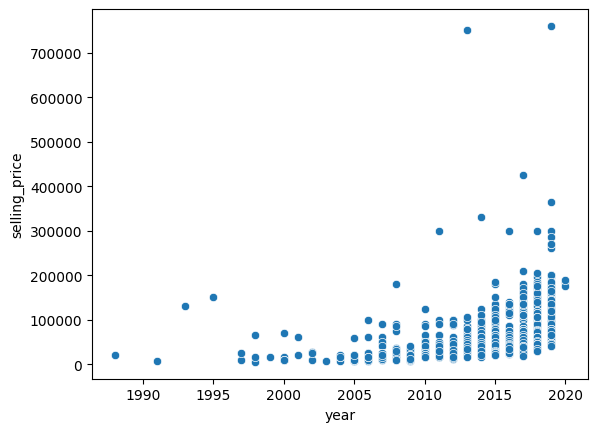

In [ ]:
sns.scatterplot(x="year" , y="selling_price",data=df)

The scatterplot shows that with time the selling price of bikes increases.


**Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?**


**ANS13.**

In [ ]:
from datetime import datetime


current_year = datetime.now().year


df['bike_age'] = current_year - df['year']


avg_price_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()


avg_price_by_age.rename(columns={'selling_price': 'avg_selling_price'}, inplace=True)
avg_price_by_age


,bike_age,avg_selling_price
0,5,183333.333333
1,6,119689.511628
2,7,87660.374046
3,8,78894.736842
4,9,58469.018692
5,10,56500.000000
6,11,48668.131868
7,12,51136.986301
8,13,35748.400000
9,14,35655.721311


As the bike age increases, the average selling price tends to decrease. This is the expected pattern, as used bikes lose value over time.

**Q14. Which bike names are priced significantly above the average price for their manufacturing year?**


**ANS14.**

In [ ]:

avg_price_by_year = df.groupby('year')['selling_price'].agg(["mean", 'std']).reset_index()


df = pd.merge(df, avg_price_by_year, on='year')


df['price_threshold'] = df['mean'] + 1.5 * df['std']


significantly_above_avg = df[df['selling_price'] > df['price_threshold']]


significantly_above_avg_bikes = significantly_above_avg[['name', 'year', 'selling_price']]


significantly_above_avg_bikes


,name,year,selling_price
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
37,Honda CBR-250R,2016,120000
42,KTM 390 Duke,2017,175000
52,Royal Enfield Electra 5 S,2010,90000
...,...,...,...
960,Royal Enfield Thunder 500,2018,175000
966,Hyosung GT250R,2016,135000
967,Royal Enfield Thunder 350,2015,125000
972,KTM 390 Duke,2016,115000


**Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

**ANS15.**

In [ ]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64
bike_age,int64
mean,float64
std,float64


In [ ]:
num_cols=['selling_price','year','km_driven','ex_showroomprice']

corr=df.corr(numeric_only=True)
corr

,selling_price,year,km_driven,ex_showroom_price,bike_age,mean,std,price_threshold
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188,0.501140,0.353638,0.450093
year,0.402188,1.000000,-0.288675,0.126378,-1.000000,0.802547,0.576350,0.760111
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675,-0.309402,-0.243017,-0.295456
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378,0.146598,0.132295,0.151744
bike_age,-0.402188,-1.000000,0.288675,-0.126378,1.000000,-0.802547,-0.576350,-0.760111
mean,0.501140,0.802547,-0.309402,0.146598,-0.802547,1.000000,0.712777,0.907188
std,0.353638,0.576350,-0.243017,0.132295,-0.576350,0.712777,1.000000,0.941716
price_threshold,0.450093,0.760111,-0.295456,0.151744,-0.760111,0.907188,0.941716,1.000000


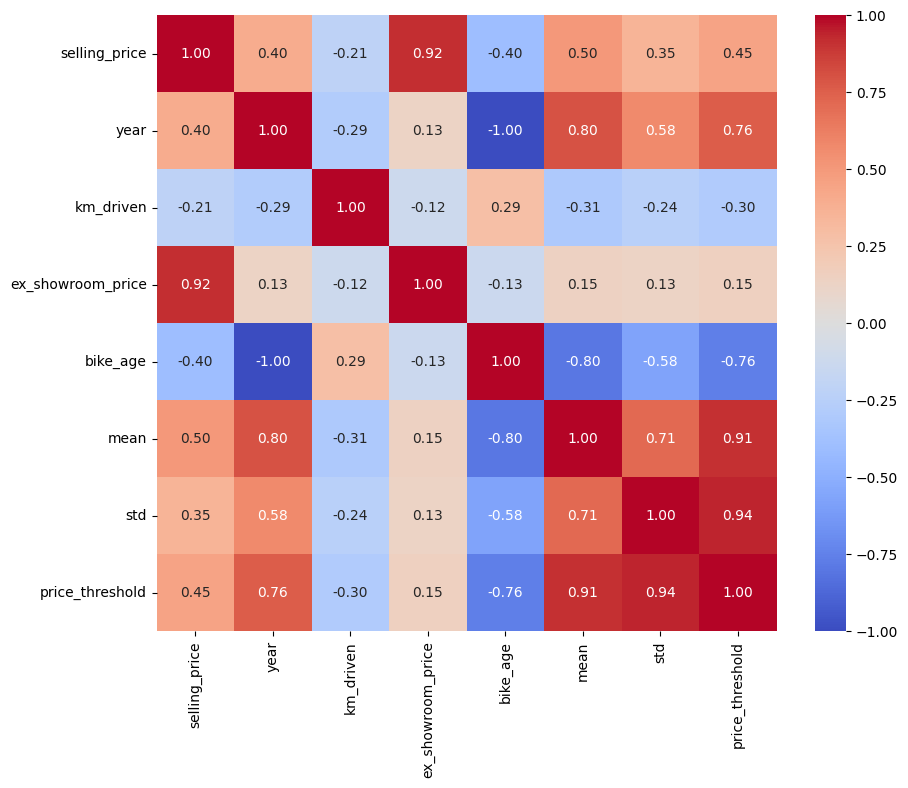

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm",fmt=".2f")
plt.show()

**EDA-2  CAR SALE DATASET**

*   List item
*   List item



In [ ]:
df=pd.read_csv("/content/Car Sale.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


**Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?**


**ANS1.**

In [ ]:
df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False).reset_index()

,Dealer_Name,Price ($)
0,U-Haul CO,28769.919006
1,Classic Chevy,28602.014446
2,Rabun Used Car Sales,28527.536177
3,Iceberg Rentals,28522.958533
4,Enterprise Rent A Car,28312.580800
5,Scrivener Performance Engineering,28297.371589
6,Gartner Buick Hyundai Saab,28247.621019
7,Saab-Belle Dodge,28190.139888
8,Capitol KIA,28189.703822
9,Race Car Help,28163.372706


**Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**


**ANS2.**

In [ ]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
price_variation_by_brand = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False).reset_index()
price_variation_by_brand

,Company,Price ($)
0,Lincoln,19658.050211
1,Saab,19653.740089
2,Cadillac,19517.120220
3,Plymouth,19065.997338
4,Lexus,17852.923492
5,Buick,17142.232626
6,Mercury,16445.172195
7,Nissan,16214.264017
8,Saturn,15990.223671
9,Ford,15849.090227


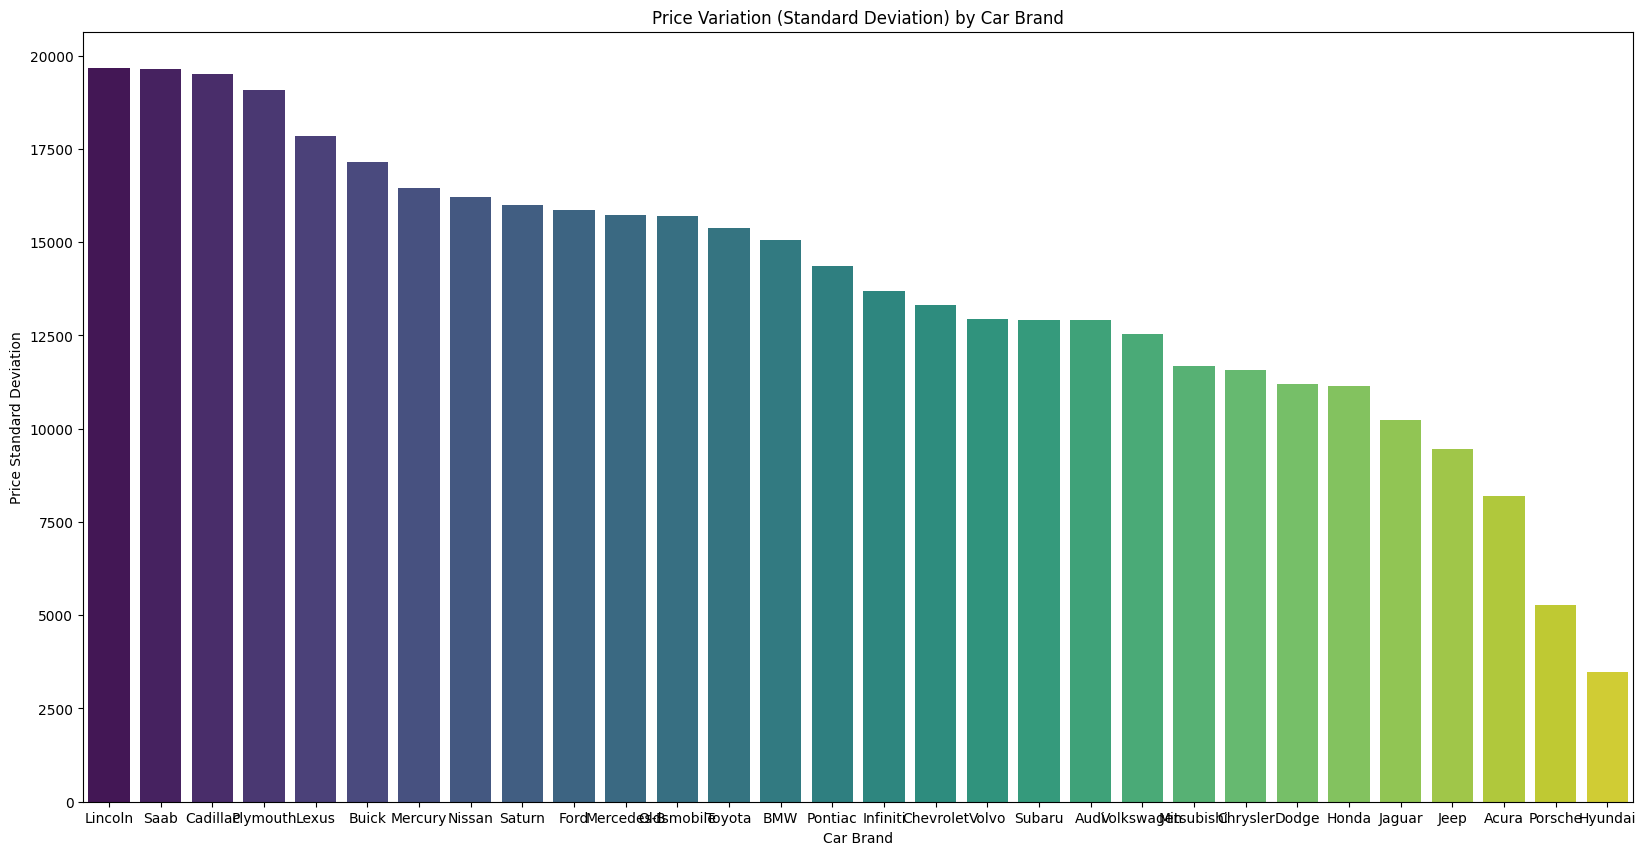

In [ ]:

plt.figure(figsize=(20, 10))
sns.barplot(x='Company', y='Price ($)', data=price_variation_by_brand, palette='viridis')
plt.title('Price Variation (Standard Deviation) by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price Standard Deviation')

plt.show()


The car brand with the highest price variation is: LINCOLN

**Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**


**ANS3.**

In [ ]:
iqr_by_transmission = df.groupby('Transmission')['Price ($)'].describe()[['25%', '50%', '75%']]
iqr_by_transmission['IQR'] = iqr_by_transmission['75%'] - iqr_by_transmission['25%']
iqr_by_transmission[['IQR']]


,IQR
Transmission,
Auto,16500.0
Manual,17000.0


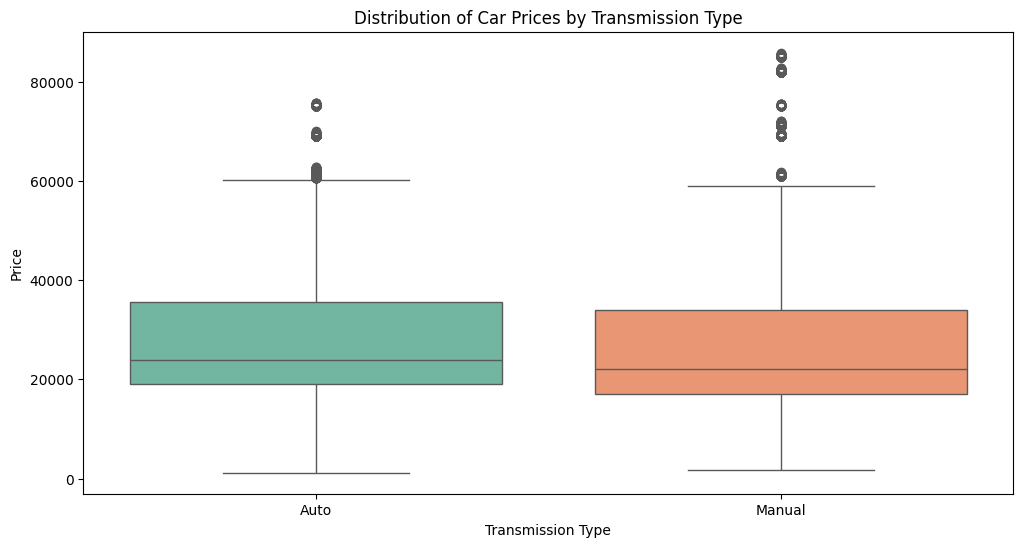

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

**Q4. What is the distribution of car prices across different regions?**

**ANS4.**

In [ ]:
df.groupby("Dealer_Region")["Price ($)"].mean()

,Price ($)
Dealer_Region,
Aurora,28334.626837
Austin,28341.603628
Greenville,28180.819054
Janesville,27833.350955
Middletown,27856.338875
Pasco,28119.039923
Scottsdale,27954.958928


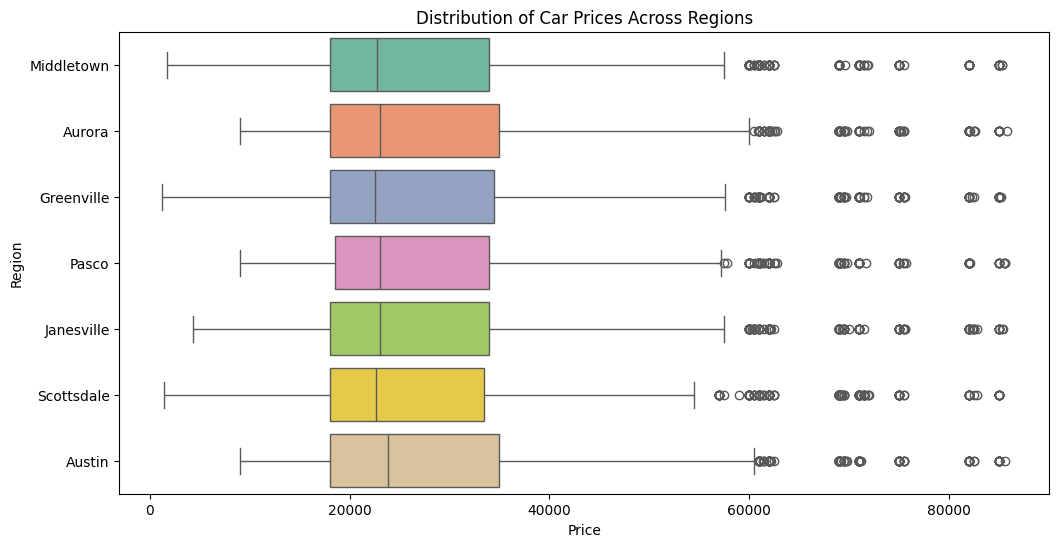

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price ($)', y='Dealer_Region', data=df, palette='Set2')
plt.title('Distribution of Car Prices Across Regions')
plt.xlabel('Price')
plt.ylabel('Region')
plt.show()

**Q5. What is the distribution of cars based on body styles?**


**ANS5.**

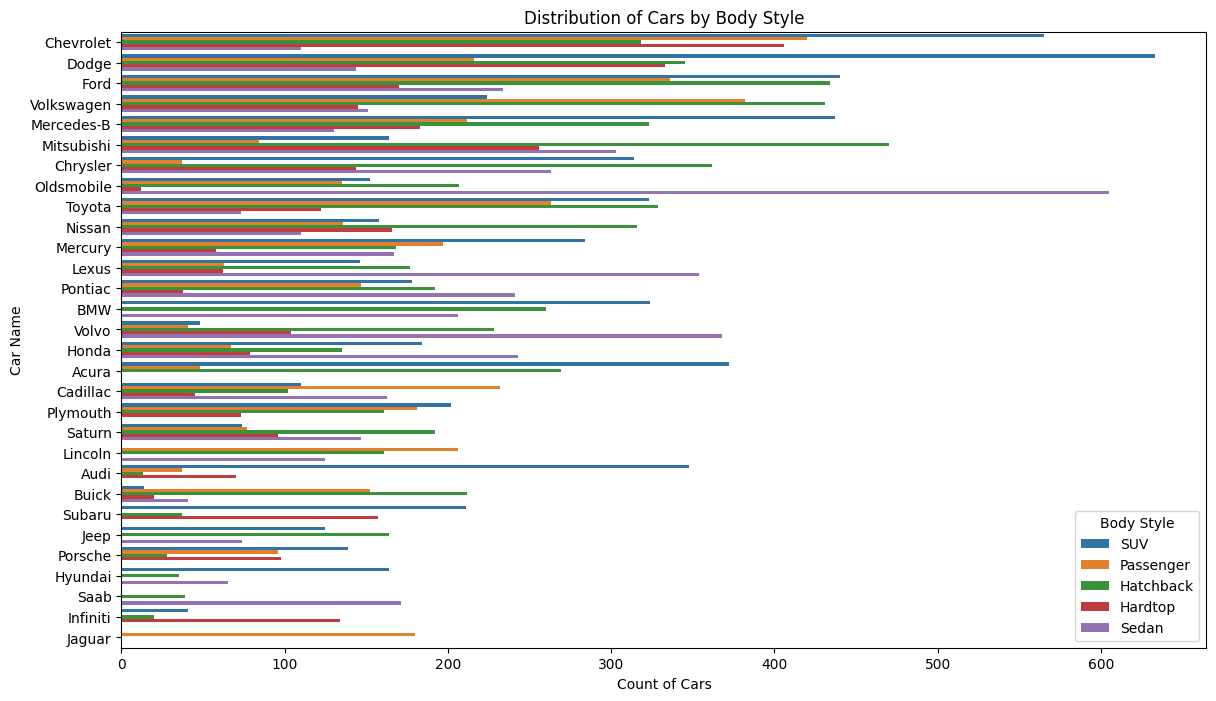

In [ ]:

car_name_distribution = df.groupby(['Body Style', 'Company']).size().reset_index


plt.figure(figsize=(14, 8))

sns.countplot(data=df, y='Company', hue='Body Style', order=df['Company'].value_counts().index)


plt.title('Distribution of Cars by Body Style')
plt.xlabel('Count of Cars')
plt.ylabel('Car Name')


plt.show()


**Q6. How does the average selling price of cars vary by customer gender and annual income?**


**ANS6.**

In [ ]:
average_price_by_gender_income=df.groupby(["Gender","Annual Income"])["Price ($)"].mean()
average_price_by_gender_income

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

**Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?**


**ANS7.**

In [ ]:
price_distribution_by_region =df.groupby('Dealer_Region')['Price ($)'].describe()
price_distribution_by_region



,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [ ]:
cars_sold_by_region = df.groupby('Dealer_Region')['Price ($)'].count()
cars_sold_by_region

,Price ($)
Dealer_Region,
Aurora,3130
Austin,4135
Greenville,3128
Janesville,3821
Middletown,3128
Pasco,3131
Scottsdale,3433


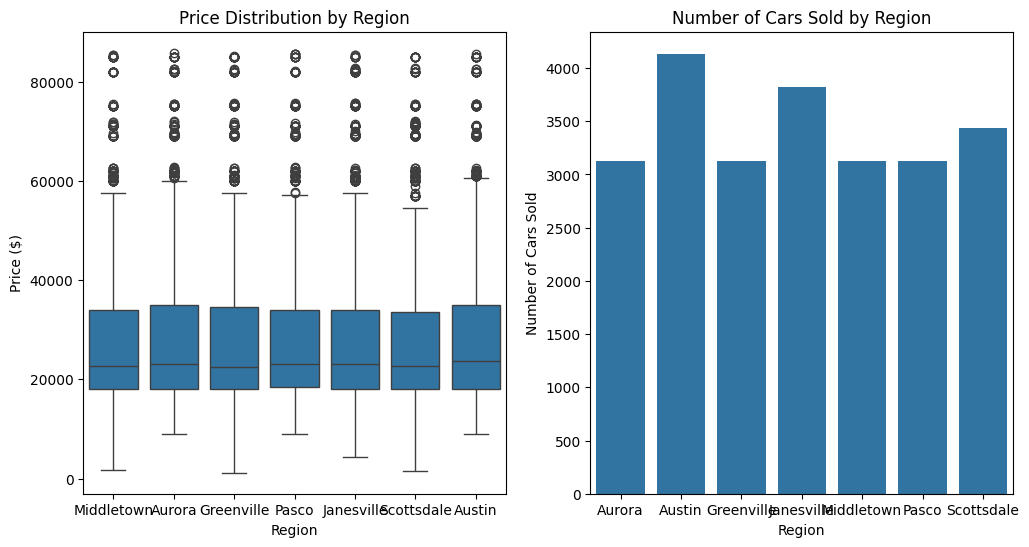

In [ ]:


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Region')



plt.subplot(1, 2, 2)
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold by Region')
plt.show()

**Q8. How does the average car price differ between cars with different engine sizes?**

**ANS8.**

In [ ]:
average_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()
average_price_by_engine_size

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


**Q9. How do car prices vary based on the customer's annual income bracket?**

**ANS9.**

In [ ]:
income_brackets = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, float('inf')], labels=['0-50k', '50k-100k', '100k-150k', '150k+'])
df['Income Bracket'] = income_brackets
average_price_by_income_bracket =df.groupby('Income Bracket')['Price ($)'].mean()
average_price_by_income_bracket

,Price ($)
Income Bracket,
0-50k,27884.297820
50k-100k,43000.000000
100k-150k,23200.200000
150k+,28149.089557


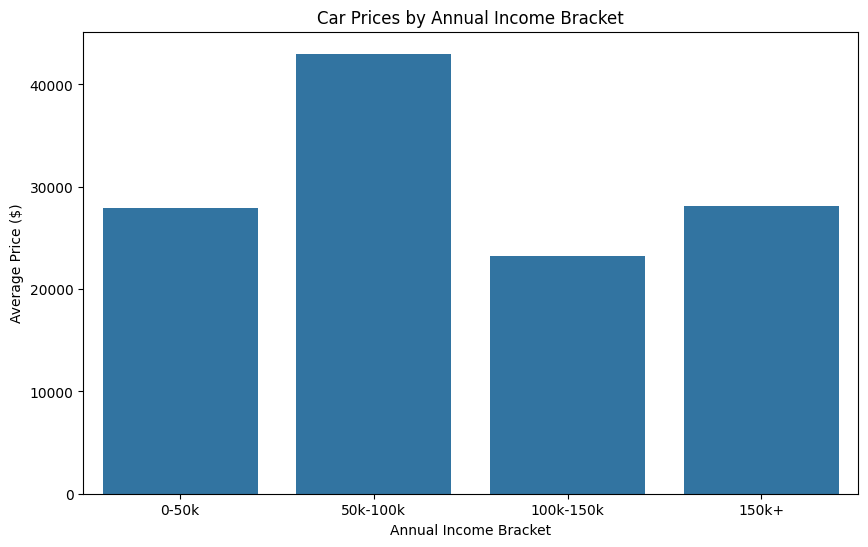

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_income_bracket.index, y=average_price_by_income_bracket.values)
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.title('Car Prices by Annual Income Bracket')
plt.show()

**Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?**


**ANS10.**

In [ ]:
top_models =df['Model'].value_counts()[:5]
top_models

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


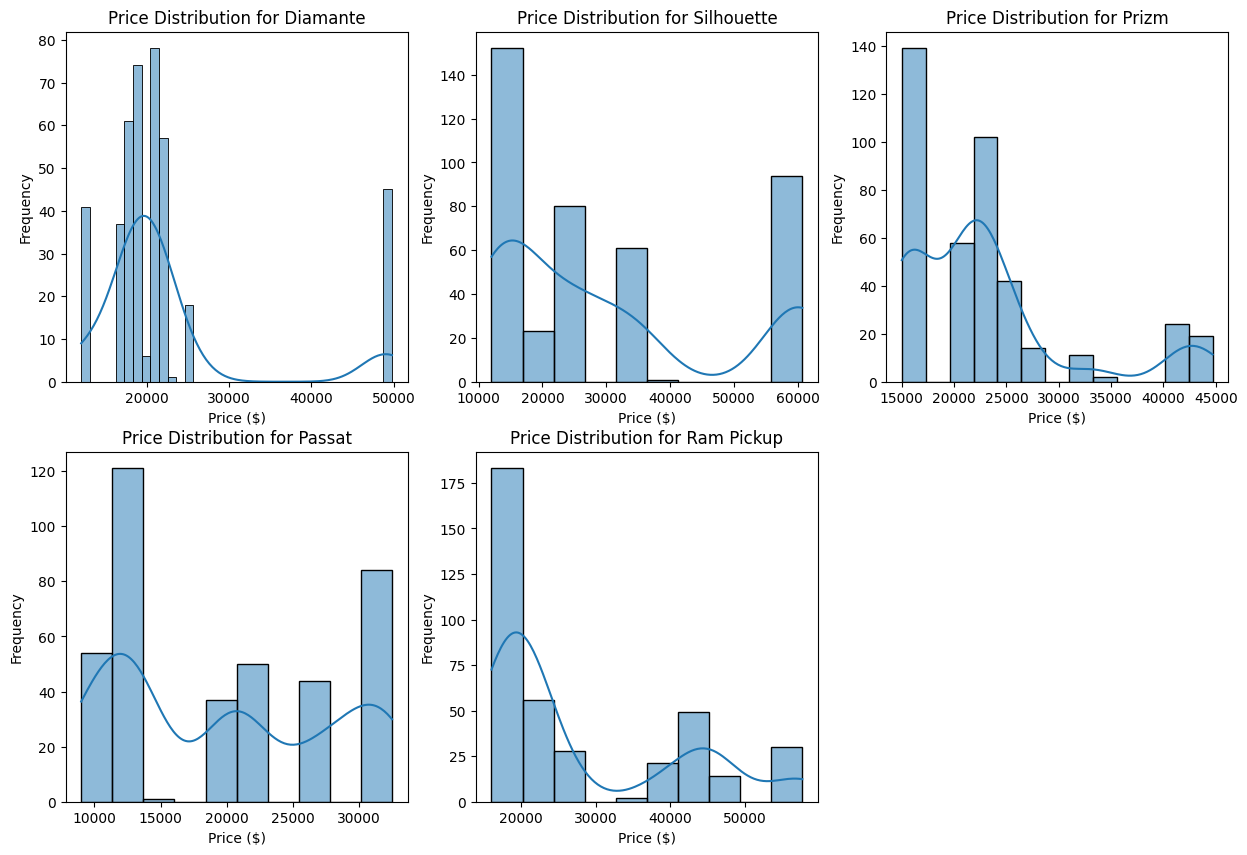

In [ ]:
plt.figure(figsize=(15, 10))

for i, model in enumerate(top_models.index):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[df['Model'] == model]['Price ($)'], kde=True)
    plt.title(f'Price Distribution for {model}')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')


plt.show()

**Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?**


**ANS11.**

Colors with the highest price variation for each engine size:
Engine
DoubleÂ Overhead Camshaft    (DoubleÂ Overhead Camshaft, Pale White)
Overhead Camshaft                         (Overhead Camshaft, Black)
Name: std, dtype: object


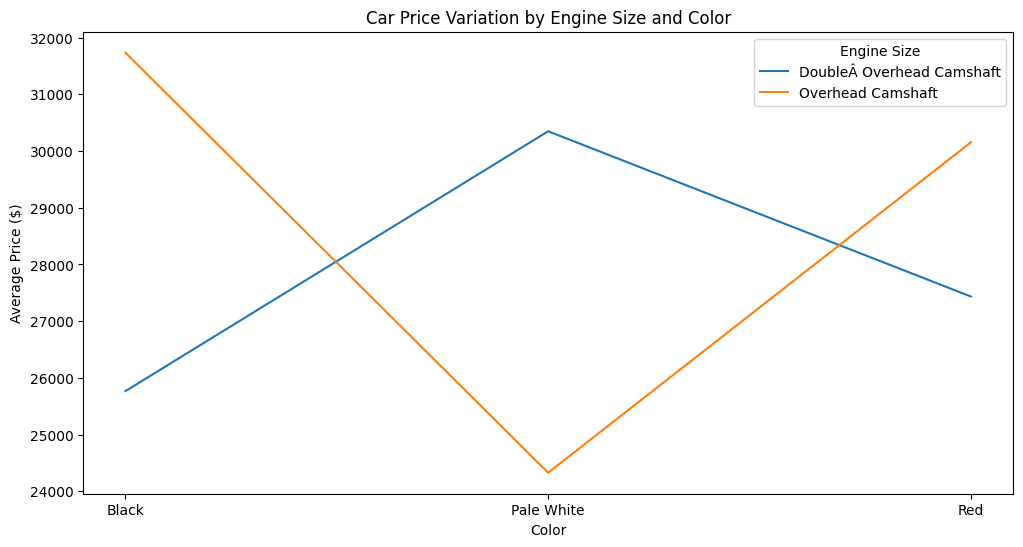

In [ ]:
price_variation_by_engine_color =df.groupby(['Engine', 'Color'])['Price ($)'].agg(['mean', 'std'])


max_variation_by_engine = price_variation_by_engine_color.groupby('Engine')['std'].idxmax()

print("Colors with the highest price variation for each engine size:")
print(max_variation_by_engine)


plt.figure(figsize=(12, 6))
for engine in price_variation_by_engine_color.index.get_level_values('Engine').unique():
    engine_data = price_variation_by_engine_color.loc[engine]
    sns.lineplot(x=engine_data.index, y=engine_data['mean'], label=engine)

plt.xlabel('Color')
plt.ylabel('Average Price ($)')
plt.title('Car Price Variation by Engine Size and Color')

plt.legend(title='Engine Size')
plt.show()


**Q12. Is there any seasonal trend in car sales based on the date of sale?**
     

**ANS12.**

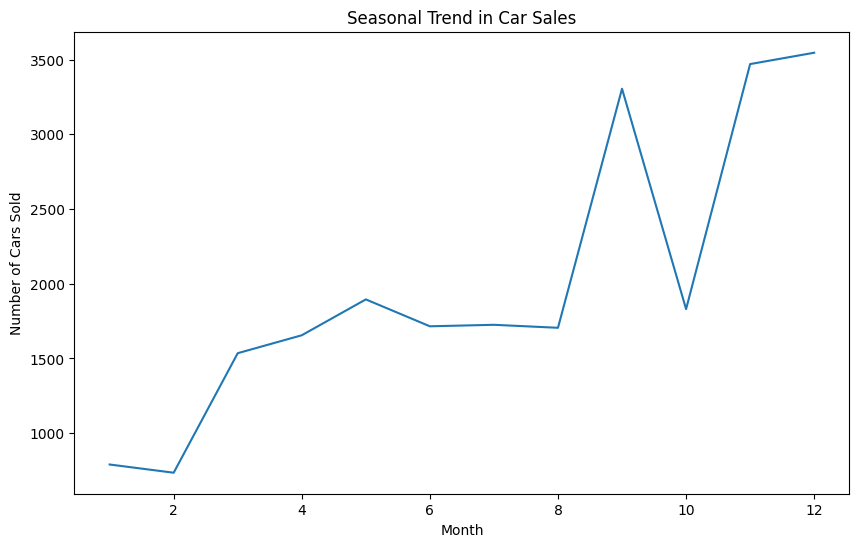

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = df['Date'].dt.month


monthly_sales = df.groupby('Month')['Price ($)'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.title('Seasonal Trend in Car Sales')

plt.show()

**Q13. How does the car price distribution change when considering different combinations of body style and transmission type?**

**ANS13.**

Car Price Distribution by Body Style and Transmission Type:
                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15

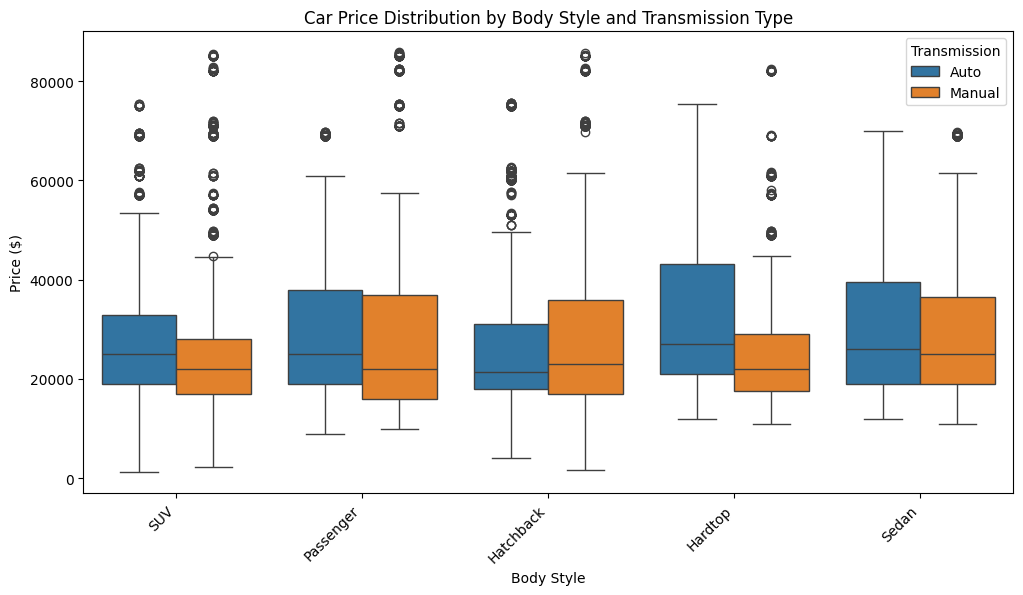

In [ ]:
price_distribution_by_body_transmission = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()


print("Car Price Distribution by Body Style and Transmission Type:")
print(price_distribution_by_body_transmission)


plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45, ha='right')
plt.show()

**Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

**ANS14.**

Correlation Matrix:
               Price ($)  Engine_Size  Annual Income
Price ($)       1.000000    -0.011271       0.012065
Engine_Size    -0.011271     1.000000      -0.006598
Annual Income   0.012065    -0.006598       1.000000


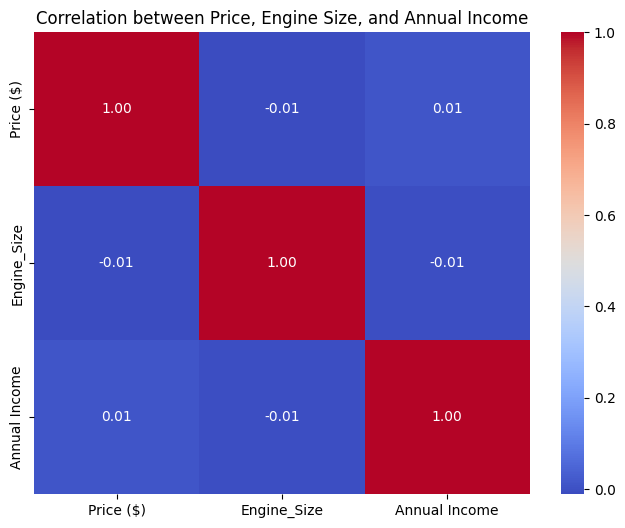

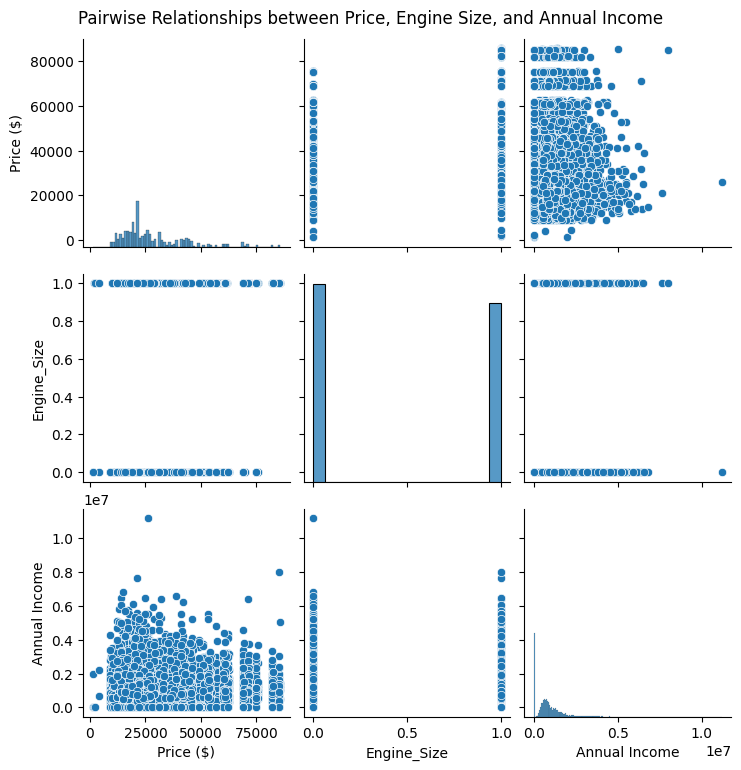

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Engine_Size'] = le.fit_transform(df['Engine'])

relevant_data = df[['Price ($)','Engine_Size', 'Annual Income']]


correlation_matrix = relevant_data.corr()


print("Correlation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Price, Engine Size, and Annual Income')
plt.show()


sns.pairplot(relevant_data)
plt.suptitle('Pairwise Relationships between Price, Engine Size, and Annual Income', y=1.02)
plt.show()

**Q15. How does the average car price vary across different car models and engine types?**

**ANS15.**

Average Car Price by Model and Engine Type:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


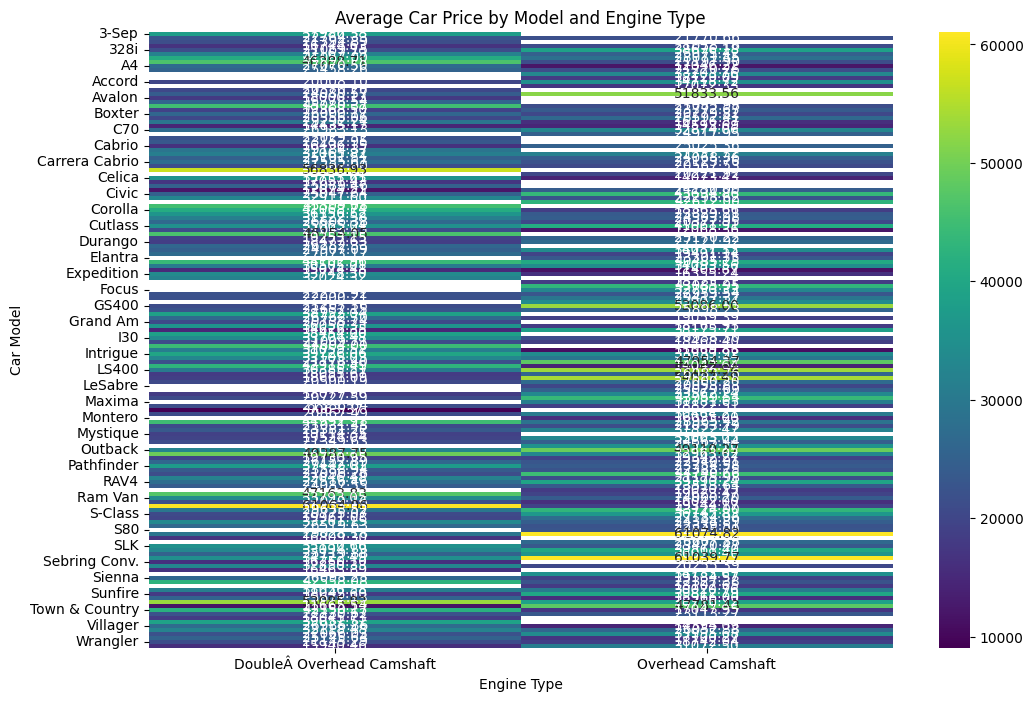

In [ ]:
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()


print("Average Car Price by Model and Engine Type:")
print(average_price_by_model_engine)


plt.figure(figsize=(12, 8))
sns.heatmap(average_price_by_model_engine, annot=True, fmt=".2f", cmap="viridis")
plt.xlabel("Engine Type")
plt.ylabel("Car Model")
plt.title("Average Car Price by Model and Engine Type")
plt.show()

**EDA 3 - Amazon Sales Data**

In [ ]:

amazon_data = pd.read_csv('/content/amazon.csv')


amazon_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

**Q1. What is the average rating for each product category?**

**ANS1.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

amazon_data['rating'] = le.fit_transform(amazon_data['rating'])

avg_rating_per_category = amazon_data.groupby('category')['rating'].mean()


print("Average Rating for Each Product Category:")
avg_rating_per_category


Average Rating for Each Product Category:


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,14.000000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,18.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,11.000000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,12.000000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,17.500000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",19.500000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",18.500000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",20.000000


**Q2. What are the top rating_count products by category?**

**ANS2.**

In [ ]:

le = LabelEncoder()

amazon_data['rating_count'] = le.fit_transform(amazon_data['rating_count'])

top_products_by_category = amazon_data.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))

print("Top rating_count products by category:")
print(top_products_by_category[['product_name', 'rating_count']])


Top rating_count products by category:
                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 772   HUMBLE Dynamic Lapel Collar Mic Voice Recordin...   
Computers&Accessories|Accessories&Peripherals|A... 844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 616   Classmate Octane Neon- B

**Q3. What is the distribution of discounted prices vs. actual prices?**

**ANS3.**

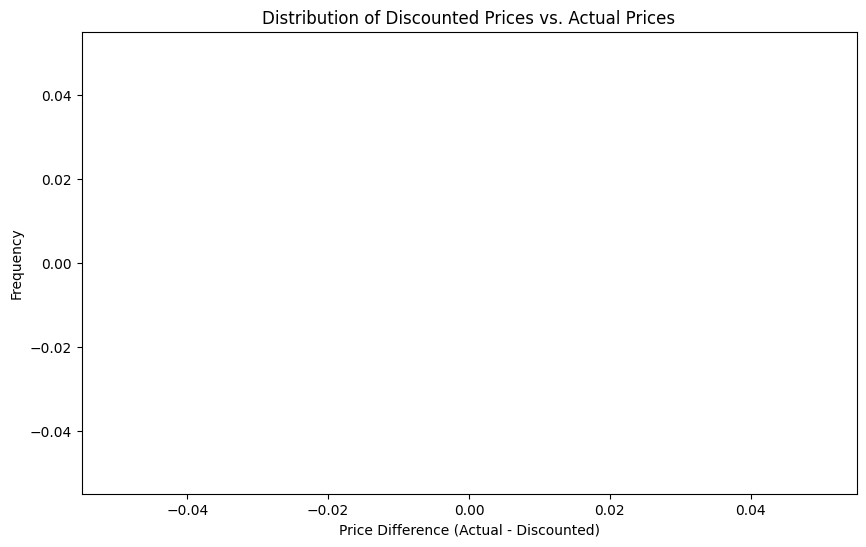

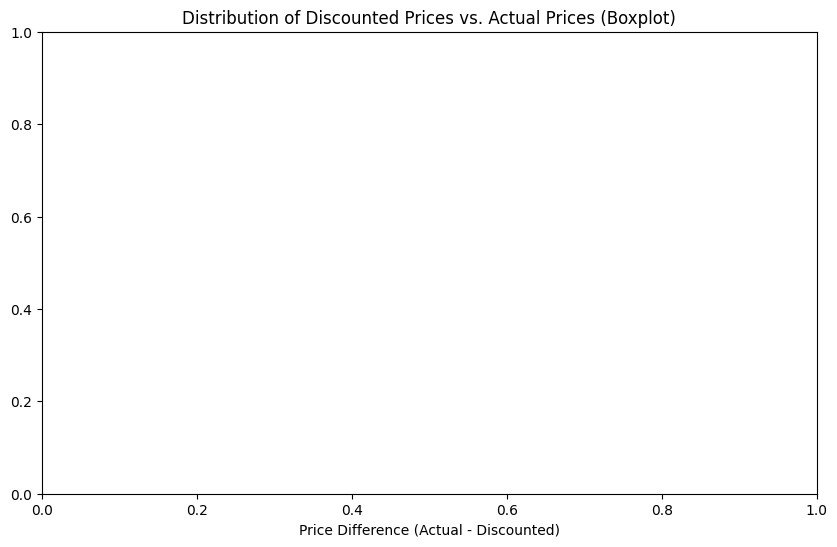

Descriptive statistics of price differences:


,price_difference
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
amazon_data['actual_price'] = pd.to_numeric(amazon_data['actual_price'], errors='coerce')
amazon_data['discounted_price'] = pd.to_numeric(amazon_data['discounted_price'], errors='coerce')

amazon_data.dropna(subset=['actual_price', 'discounted_price'], inplace=True)


amazon_data['price_difference'] = amazon_data['actual_price'] - amazon_data['discounted_price']

plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['price_difference'], kde=True)
plt.xlabel('Price Difference (Actual - Discounted)')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=amazon_data['price_difference'])
plt.xlabel('Price Difference (Actual - Discounted)')
plt.title('Distribution of Discounted Prices vs. Actual Prices (Boxplot)')
plt.show()


price_difference_stats = amazon_data['price_difference'].describe()
print("Descriptive statistics of price differences:")
price_difference_stats

**Q4. How does the average discount percentage vary across categories?**

**ANS4.**

Average Discount Percentage by Category:
Series([], Name: discount_percentage, dtype: float64)


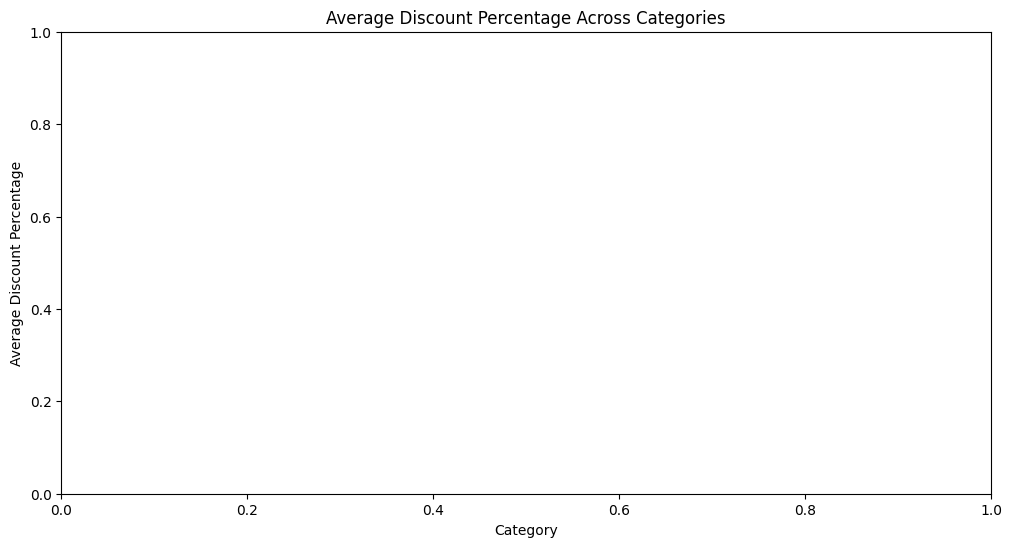

In [ ]:
amazon_data['discount_percentage'] = ((amazon_data['actual_price'] - amazon_data['discounted_price']) / amazon_data['actual_price']) * 100

average_discount_by_category = amazon_data.groupby('category')['discount_percentage'].mean()


print("Average Discount Percentage by Category:")
print(average_discount_by_category)

plt.figure(figsize=(12, 6))
sns.barplot(x=average_discount_by_category.index, y=average_discount_by_category.values)
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount Percentage Across Categories')
plt.show()

**Q5. What are the most popular product names?**

**ANS5.**

In [ ]:
amazon_data['product_name'].value_counts()[:10]



,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",3
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3


**Q6. What are the most popular product keywords?**

**ANS6.**

In [ ]:
from collections import Counter

def extract_keywords(product_name):

    keywords = product_name.lower().split()
    return keywords

all_keywords = []

for product_name in amazon_data['product_name']:
    keywords = extract_keywords(product_name)
    all_keywords.extend(keywords)


keyword_counts = Counter(all_keywords)


most_common_keywords = keyword_counts.most_common(10)


if most_common_keywords:
    print("Most Popular Product Keywords:")
    for keyword, count in most_common_keywords:
        print(f"{keyword}: {count}")


    plt.figure(figsize=(12, 6))
    keywords, counts = zip(*most_common_keywords)
    sns.barplot(x=list(keywords), y=list(counts))
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.title('Top 10 Most Popular Product Keywords')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No common keywords found in product names.")


No common keywords found in product names.


**Q7. What are the most popular product reviews?**

**ANS7.**

Most Popular Product Review Titles:
Series([], Name: count, dtype: int64)


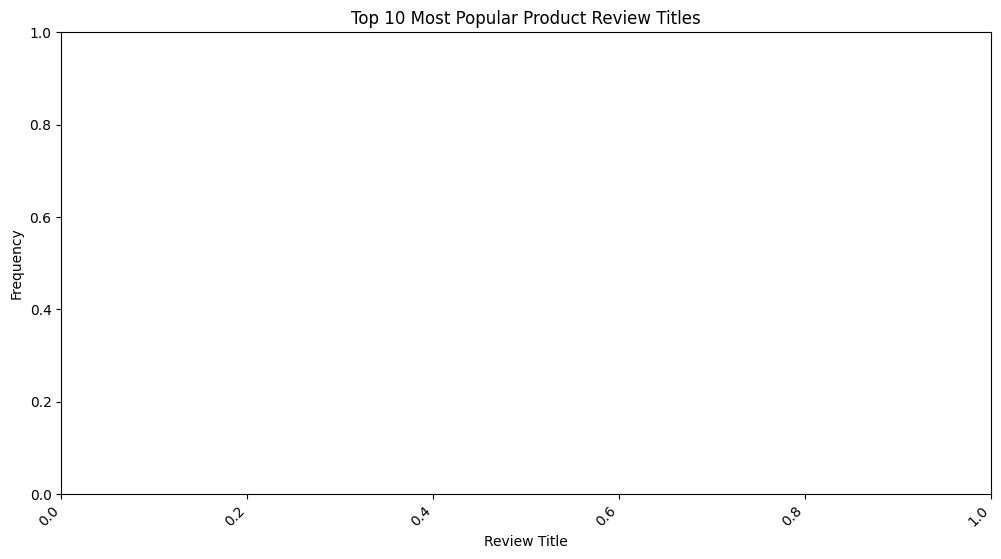

In [ ]:
 amazon_data['review_title'].uniquepopular_reviews = amazon_data['review_title'].value_counts()

print("Most Popular Product Review Titles:")
print(popular_reviews.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_reviews.head(10).index, y=popular_reviews.head(10).values)
plt.xlabel('Review Title')
plt.ylabel('Frequency')
plt.title('Top 10 Most Popular Product Review Titles')
plt.xticks(rotation=45, ha='right')
plt.show()




**Q8. What is the correlation between discounted_price and rating?**


**ANS8.**

In [ ]:
amazon_data['discounted_price'].corr(amazon_data['rating'])

nan

**Q9. What are the Top 5 categories based on the highest ratings?**


**ANS9.**

In [ ]:
top_5_categories = avg_rating_per_category.sort_values(ascending=False).head(5)

print("Top 5 categories based on the highest ratings:")
top_5_categories

Top 5 categories based on the highest ratings:


,rating
category,
Computers&Accessories|Tablets,23.0
Home&Kitchen|CraftMaterials|PaintingMaterials,22.0
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,22.0
OfficeProducts|OfficeElectronics|Calculators|Basic,22.0
Computers&Accessories|Components|Memory,22.0


**Q10. Identify any potential areas for improvement or optimization based on the data analysis.**

**ANS10:** Potential areas for improvement and optimization:

1. Data Cleaning and Preprocessing:

Handle missing values more effectively. Instead of dropping rows with missing prices, consider imputation techniques (e.g., mean, median, or more sophisticated methods) to retain more data.

Investigate the meaning of '0' values in numerical columns (e.g. 'Annual Income', 'Price', 'Engine Size') and decide on the best way to handle them.

Inconsistent data formats may exist in some fields, such as dates or prices. Ensure consistency with type conversion and formatting.

2. Feature Engineering:

Create new features that capture important information not explicitly represented in the data. For example, derived features such as "Price per Horsepower," "Discount Percentage," or "Age of the Car" can improve analysis.

Explore creating interaction terms in the correlation analysis (e.g., 'Engine_Size' * 'Annual Income').

Binning numerical data ('Annual Income') to create meaningful categories may reveal additional insights.

3. Visualization Enhancements:

Use more informative plot types when appropriate. For example, consider using scatter plots to examine the relationship between continuous variables instead of just heatmaps.

Improve the readability of visualizations by using clear labels, titles, and legends.

Explore more advanced visualizations like interactive plots for better exploration and communication of findings.

4. Statistical Analysis:
Perform more detailed statistical tests beyond correlation analysis, such as t-tests or ANOVA, to validate hypotheses about relationships between variables.

Conduct hypothesis testing to test assumptions before drawing conclusions.

5. Model Building (If applicable):

If you plan to build predictive models, carefully select appropriate models and features, and evaluate their performance rigorously.

Consider feature scaling and encoding when applying machine learning algorithms.

Optimize model hyperparameters for better accuracy and generalization.

6. Keyword Extraction Refinement:

Use more robust keyword extraction techniques beyond simple splitting. Natural language processing (NLP) techniques can lead to better keyword identification.

7. Robustness of encoding:

LabelEncoder's application should be handled cautiously. Explore OneHotEncoding or other encoding methods, especially when dealing with features that do not necessarily represent any ordinal relationship.

8. Data Exploration Depth:

Dive deeper into the unique values of categorical columns and their distribution in relation to the target variable (e.g., 'Price').

Segment the data into relevant groups (e.g., by 'Region', 'Model') for more detailed analyses.

9. Documentation:

Include detailed explanations of the steps and rationale behind the data cleaning, feature engineering, and analysis. This improves code clarity and facilitates collaboration.

10. Code Structure:

Modularize the code into reusable functions for improved readability and maintainability.

By addressing these potential areas for improvement, you can gain a deeper understanding of the data, improve model accuracy (if applicable), and enhance the insights derived from the analysis.

**EDA 4 : Spotify Data**

In [ ]:
spotify_data=pd.read_csv("/content/spotify.csv")
spotify_data

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


**Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?**

**ANS1.**

In [ ]:
print(spotify_data.isnull().sum())


spotify_data.fillna(0, inplace=True)


duplicate_rows = spotify_data[spotify_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")


spotify_data.drop_duplicates(inplace=True)

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 0


**Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?**

**ANS2.**

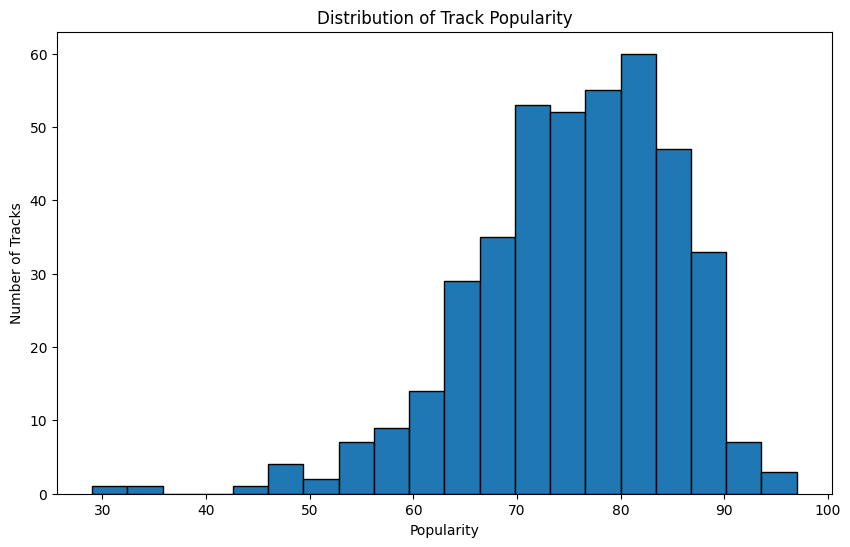

In [ ]:
popularity_counts = spotify_data['Popularity'].value_counts()


plt.figure(figsize=(10, 6))
plt.hist(spotify_data['Popularity'], bins=20, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()

**Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?**

**ANS3.**

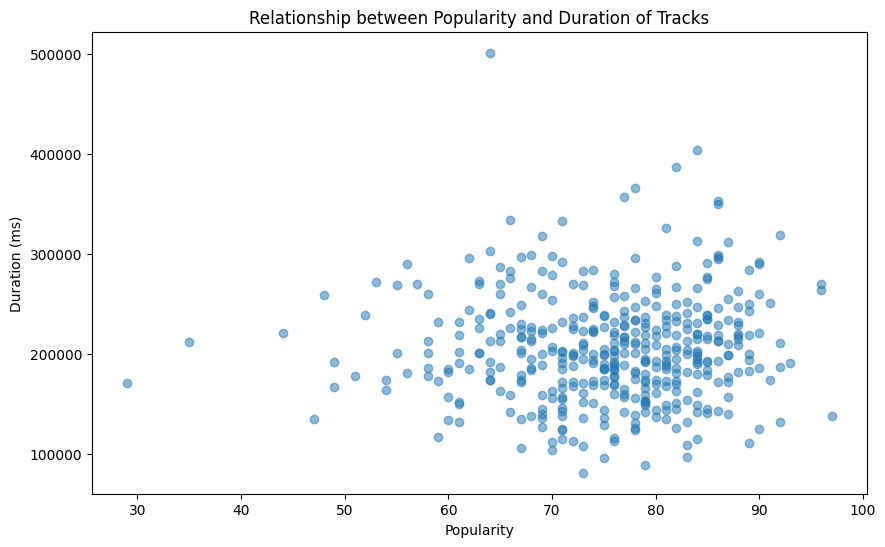

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(spotify_data['Popularity'], spotify_data['Duration (ms)'], alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.title('Relationship between Popularity and Duration of Tracks')
plt.show()

**Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.**

**ANS4.**

The artist with the highest number of tracks is Drake with 17 tracks.


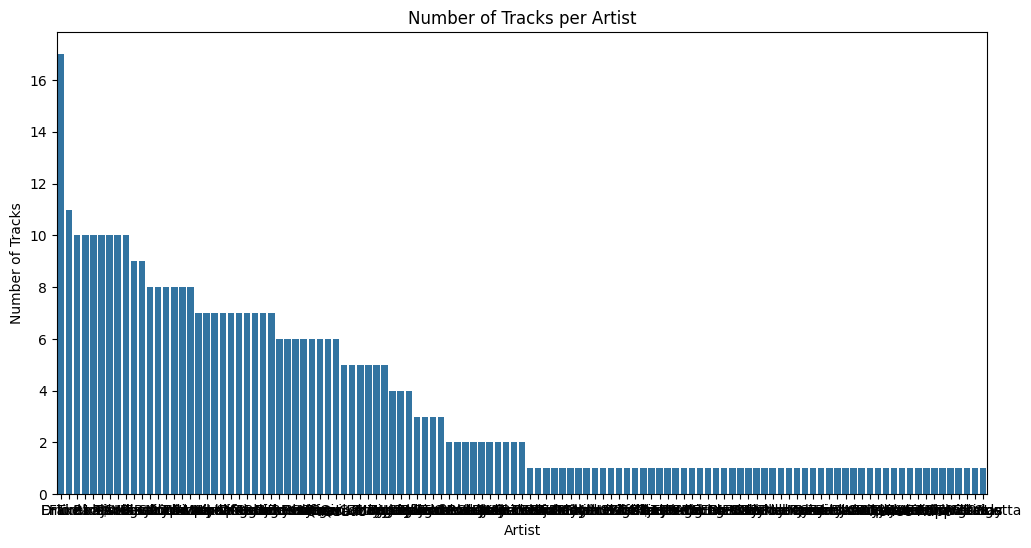

In [ ]:
artist_track_counts = spotify_data['Artist'].value_counts()


artist_with_highest_tracks = artist_track_counts.index[0]
highest_track_count = artist_track_counts.iloc[0]

print(f"The artist with the highest number of tracks is {artist_with_highest_tracks} with {highest_track_count} tracks.")


plt.figure(figsize=(12, 6))
sns.countplot(x='Artist', data=spotify_data, order=artist_track_counts.index)
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Artist')
plt.show()

**Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

**ANS5.**

In [ ]:
least_popular_tracks = spotify_data.sort_values(by='Popularity').head(5)


print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name']])

Top 5 Least Popular Tracks:
             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


**Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.**

**ANS6.**

In [ ]:
top_5_artists = spotify_data['Artist'].value_counts().head(5).index


average_popularity_by_artist = {}
for artist in top_5_artists:
    artist_data = spotify_data[spotify_data['Artist'] == artist]
    average_popularity = artist_data['Popularity'].mean()
    average_popularity_by_artist[artist] = average_popularity


artist_with_highest_avg_popularity = max(average_popularity_by_artist, key=average_popularity_by_artist.get)
highest_average_popularity = average_popularity_by_artist[artist_with_highest_avg_popularity]


print("Average Popularity for Top 5 Artists:")
for artist, avg_popularity in average_popularity_by_artist.items():
    print(f"{artist}: {avg_popularity}")

print(f"\nThe artist with the highest average popularity among the top 5 is {artist_with_highest_avg_popularity} with an average popularity of {highest_average_popularity}")


Average Popularity for Top 5 Artists:
Drake: 82.88235294117646
Eminem: 83.63636363636364
Flo Rida: 78.0
Ludacris: 63.0
Timbaland: 69.0

The artist with the highest average popularity among the top 5 is Eminem with an average popularity of 83.63636363636364


**Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

**ANS7.**

In [ ]:
top_5_artists = spotify_data['Artist'].value_counts().head(5).index


for artist in top_5_artists:
    artist_data = spotify_data[spotify_data['Artist'] == artist]
    most_popular_track = artist_data.loc[artist_data['Popularity'].idxmax()]
    print(f"Artist: {artist}, Most Popular Track: {most_popular_track['Track Name']}")

Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem, Most Popular Track: Without Me
Artist: Flo Rida, Most Popular Track: Low (feat. T-Pain)
Artist: Ludacris, Most Popular Track: My Chick Bad
Artist: Timbaland, Most Popular Track: The Way I Are


**Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

**ANS8.**

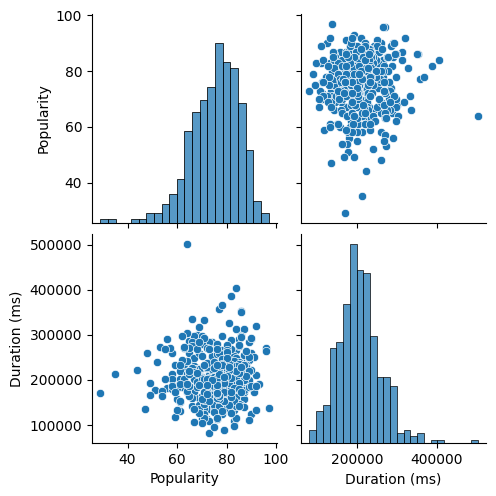

In [ ]:
numerical_cols = spotify_data.select_dtypes(include=np.number).columns
sns.pairplot(spotify_data[numerical_cols])
plt.show()

**Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.**

**ANS9.**

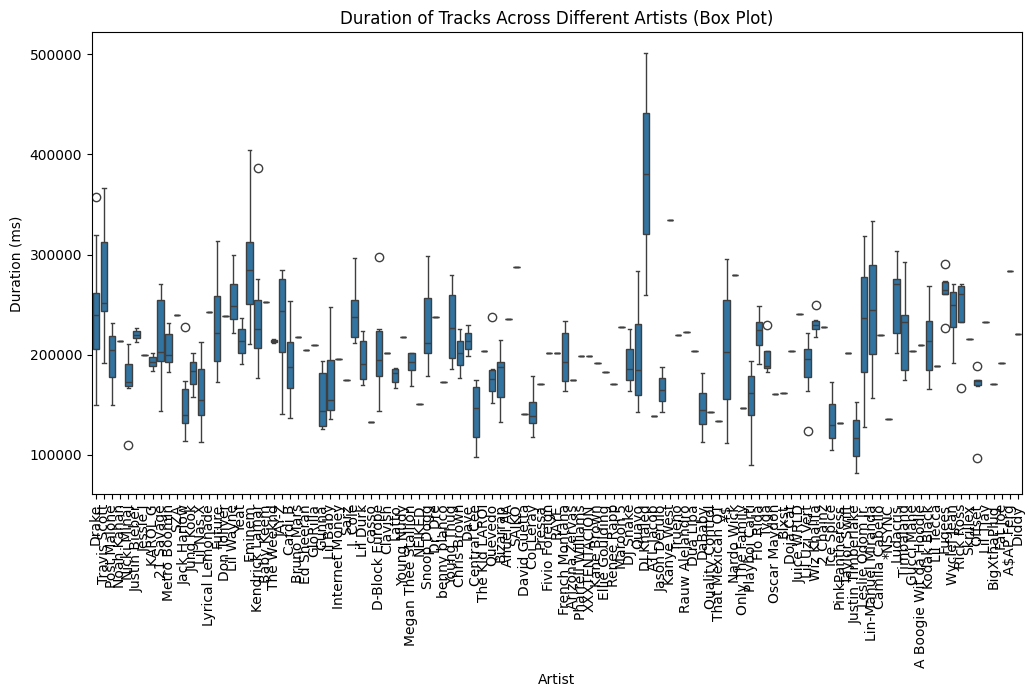

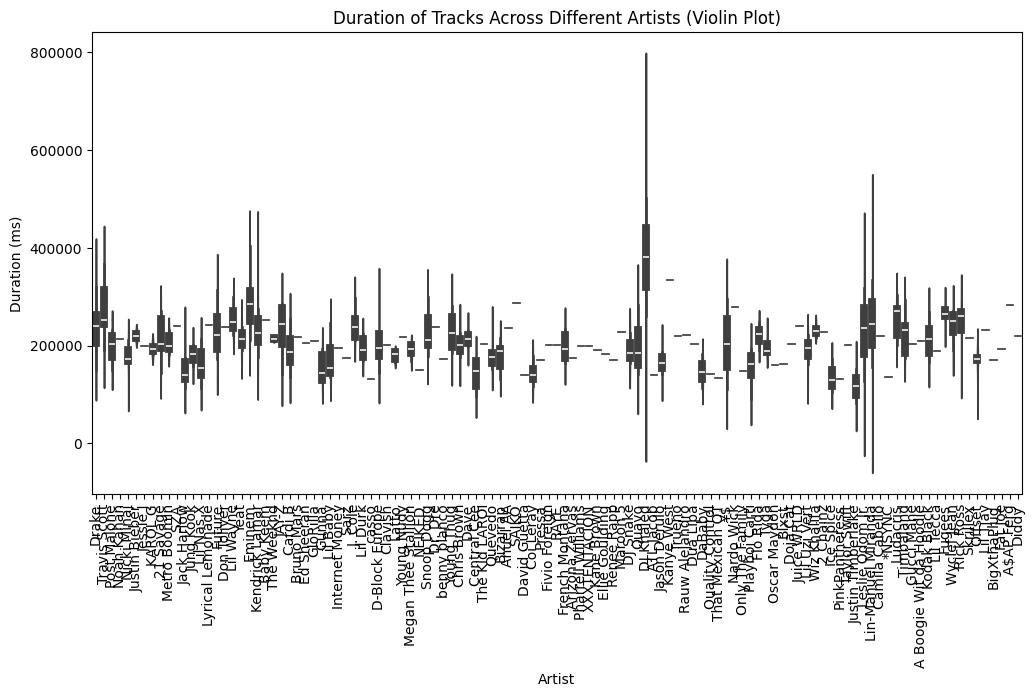

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=spotify_data)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks Across Different Artists (Box Plot)')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=spotify_data)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks Across Different Artists (Violin Plot)')
plt.xticks(rotation=90)
plt.show()

**Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.**

**ANS10.**

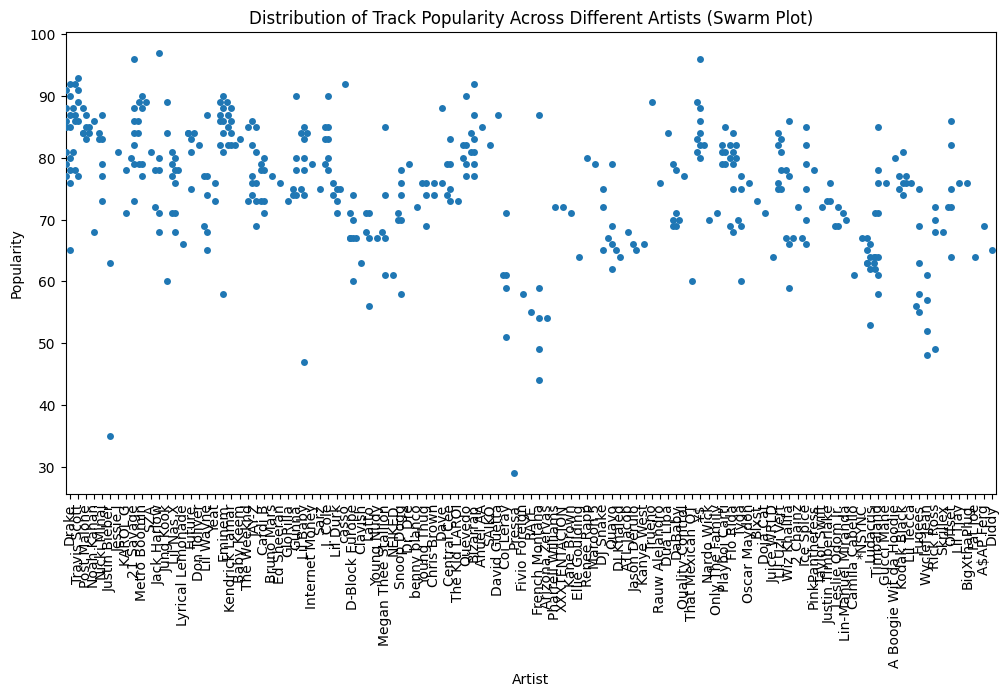

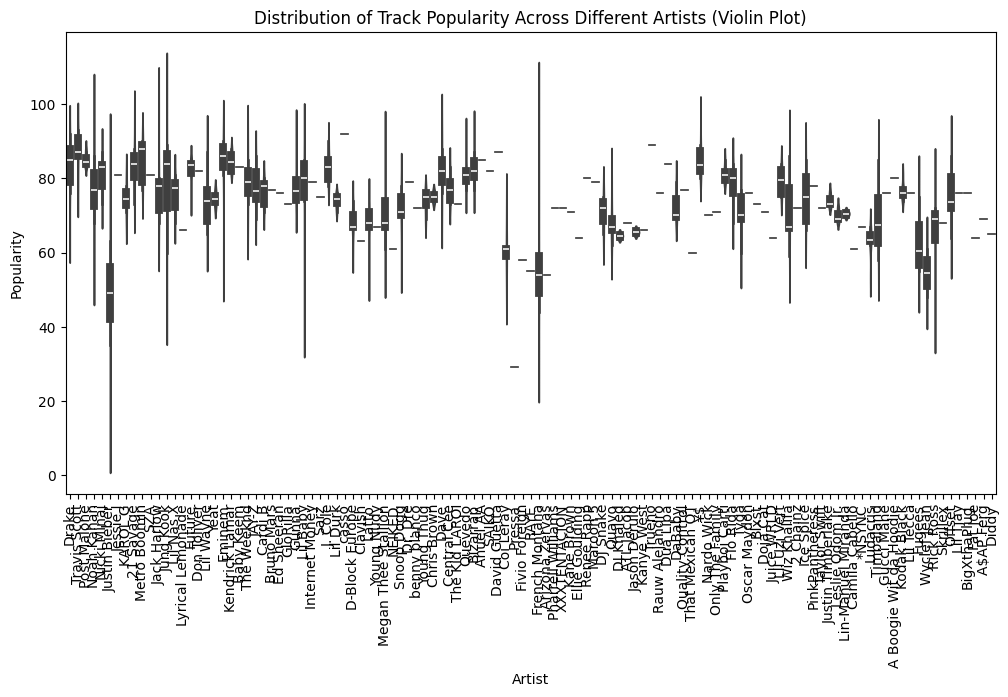

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=spotify_data)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity Across Different Artists (Swarm Plot)')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=spotify_data)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity Across Different Artists (Violin Plot)')
plt.xticks(rotation=90)
plt.show()